<a href="https://colab.research.google.com/github/sudipbhattarai820/ML_Projects/blob/main/Credit_Card_Fraud_Detection_RF_SMOTE_ADASYN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing all the necessary libraries

In [130]:
import pandas as pd  #importing pandas library
import numpy as np   #importing numpy library
import matplotlib.pyplot as plt #importing matplotlib.pyplot library
import seaborn as sns # importing seaborn library for visualization

In [131]:
# reading the data from csv and loading into a pandas Dataframe
data = pd.read_csv('creditcard.csv')
data.head() #Displaying the top 5 rows of the data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


## Exploratory Data Analysis

In [132]:
# Lets get some information abut the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

**`Observations:`** We can observe that we have  there are 30 features with 272799 instances. All the features are float32 type.






In [133]:
# Lets see the summary of the data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,...,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13953.000000,13953.000000
mean,10121.161817,-0.235676,0.284287,0.846047,0.302775,-0.118730,0.128013,-0.157297,-0.016148,0.989827,...,-0.068037,-0.157471,-0.035585,0.011158,0.117019,0.035544,0.012787,0.002122,63.882442,0.004013
std,7739.625811,1.720315,1.394804,1.561376,1.500595,1.289494,1.320395,1.238583,1.262024,1.214044,...,0.873942,0.621845,0.499807,0.587225,0.427953,0.558290,0.399550,0.255710,177.887021,0.063227
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2984.250000,-0.969786,-0.282728,0.407297,-0.623141,-0.717155,-0.624025,-0.616307,-0.182270,0.288101,...,-0.271778,-0.549723,-0.173807,-0.339656,-0.135887,-0.374596,-0.076862,-0.014869,5.490000,0.000000
50%,9086.500000,-0.319439,0.252904,0.960978,0.220104,-0.191627,-0.144198,-0.111960,0.016945,0.971414,...,-0.132304,-0.122777,-0.045041,0.060208,0.155162,-0.035825,-0.000950,0.016238,15.690000,0.000000
75%,17103.500000,1.162662,0.884741,1.607031,1.198942,0.351255,0.508494,0.421830,0.265736,1.654184,...,0.018677,0.228997,0.069750,0.392734,0.393032,0.375271,0.098516,0.072497,52.150000,0.000000
max,24759.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [134]:
# As we can't see the other remaining the columns 
selected_columns = data.iloc[:,20:31]
selected_columns.describe()

,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13954.000000,13953.000000,13953.000000
mean,0.022740,-0.068037,-0.157471,-0.035585,0.011158,0.117019,0.035544,0.012787,0.002122,63.882442,0.004013
std,0.584038,0.873942,0.621845,0.499807,0.587225,0.427953,0.558290,0.399550,0.255710,177.887021,0.063227
min,-13.276034,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,-0.162353,-0.271778,-0.549723,-0.173807,-0.339656,-0.135887,-0.374596,-0.076862,-0.014869,5.490000,0.000000
50%,-0.038037,-0.132304,-0.122777,-0.045041,0.060208,0.155162,-0.035825,-0.000950,0.016238,15.690000,0.000000
75%,0.138816,0.018677,0.228997,0.069750,0.392734,0.393032,0.375271,0.098516,0.072497,52.150000,0.000000
max,8.012574,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


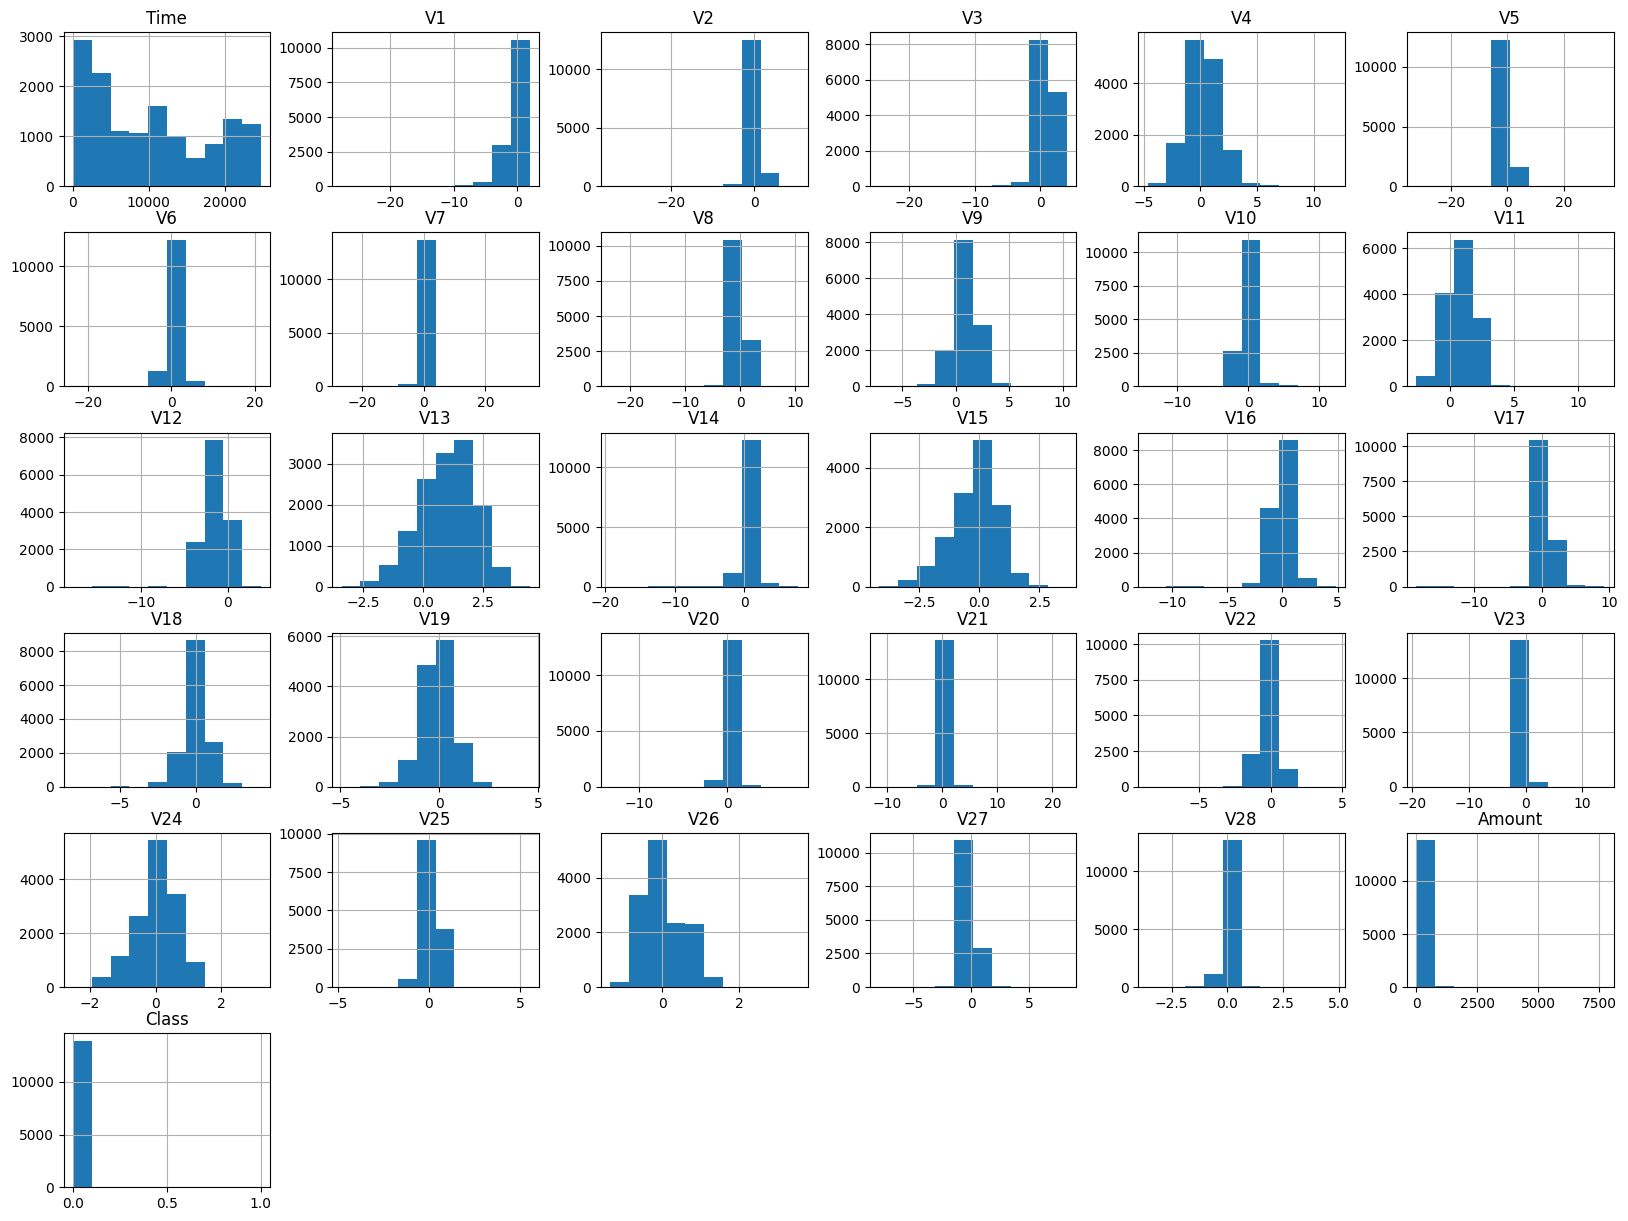

In [135]:
# Let's visualize the data with a histogram
data.hist(figsize=(20,15))
plt.show()

All the data we se are normally distributed but let's focus on more class features.

<Axes: >

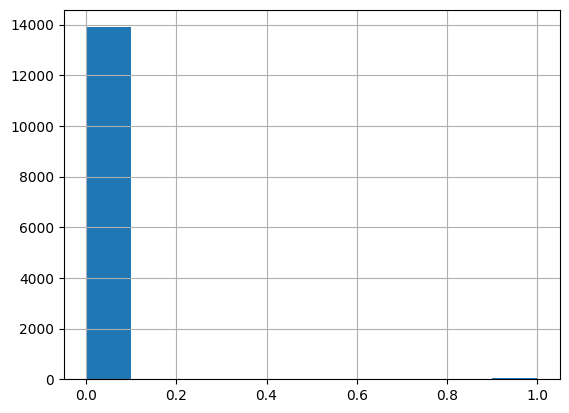

In [136]:
data['Class'].hist()

In [137]:
# Let's see the count of the class by values
data['Class'].value_counts()

0.0    13897
1.0       56
Name: Class, dtype: int64

**`Observation:`** As we can see there is high imbalance in the data, so we can use many techniques such as SMOTE to tackle this problem.

In [138]:
#Now, lets see the correlation matrix and visualize the correlation matrix
corr_matrix = data.corr()

<Axes: >

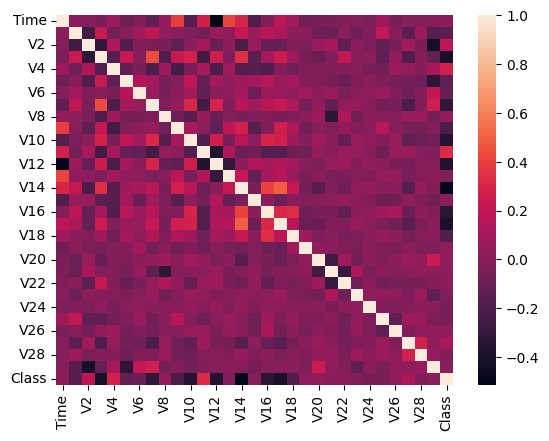

In [139]:
## Let's try to visualize the data
sns.heatmap(corr_matrix)

**`Observations:`** We can observe all the features are independent to each other and there is no correlation among the features.

# **Data Preprocessing** 
1. First, we need to check for any null values.
2. We need to drop any unnecessary columns such as time.
3. We need to feature scale using min-max scaler or standardization.
4. We need to check is there need for feature engineering or extraction, but both are not needed as we don't know what each column represents here.
5. We need to split the data into training and test data.

In [140]:
# First, we have to check whether we have any null values in our datasets
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

* We can observe that there are 1 null value in features from V8 to class. Either we can drop these null values or we can use data estimates to fill the null values.
* We are going to drop null values.

In [141]:
## Let's drop the null values
data = data.dropna()
## Let's also drop any duplicate values
data = data.drop_duplicates()

##**Normalize the time and amount column**

* We can observe that there are mainly two features that have different scales, which are time and amount, so it is best idea to normalize the data.
* We will use the robust scaler which takes median to subtract the data and divide it with IQR (Interquartile Range). This scaler is used other than min max scale or standard scale because as our time data is more skewed right and amount is more skewed to the left because of outliers.

In [142]:
from sklearn.preprocessing import RobustScaler  ## Importing the RobustScaler to normalize the data.
sc = RobustScaler()
data['Time'] = sc.fit_transform(data['Time'].values.reshape(-1,1))  ## We fit the time column to robustscaler to find the median and IQR and transform our whole column using fit_transform method
data['Amount'] = sc.fit_transform(data['Amount'].values.reshape(-1,1)) ## We are repeating the same process as above, fitting and transforming our amount column.

##**Using SMOTE and ADASYN to balance the imbalanced data**

---



In [143]:
from imblearn.over_sampling import SMOTE ## Importing the SMOTE (Synthetic Minority OverSampling Technique)
from sklearn.model_selection import train_test_split ## for splitting our data into train and test set

X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:-1],data.iloc[:,-1]) # Here slicing the dataframe, take all the rows and columns except the last column for the 
                                                                                   # training data and last column for the label data as it represents the class.

In [144]:
## Let's first use the SMOTE techniques and see what does the confusion matrix looks like, after RF(Random Forest classifier)

X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

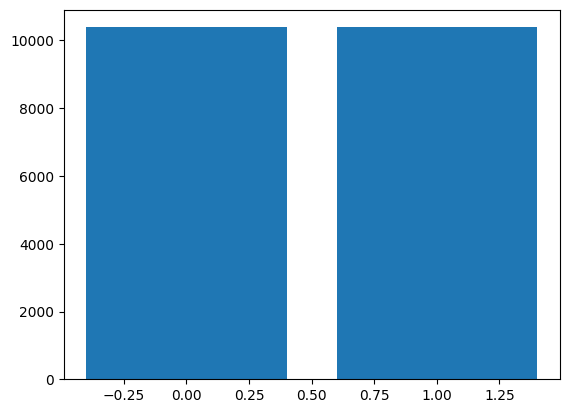

In [145]:
## Let's define a function to plot the bar graph that shws the number of instances that belong to each class
def plot_bar_class(y_resampled):
  ## Just plotting a small bar graph to see how class are distributed after the resampling method
  categories = [0,1] ## Declaring the classes for the labels which is just 0 and 1
  values = [len(y_resampled[y_resampled == 0]), len(y_resampled[y_resampled == 1])]  ## getting the total number of instances whose class are either 0 or 1.
  plt.bar(categories, values)
  plt.show()

plot_bar_class(y_resampled)

# Modelling using Random Forest after SMOTE

In [146]:
from sklearn.ensemble import RandomForestClassifier  ## Let's import the RandomForestClassifier from the sklearn's ensemble module.
rfc = RandomForestClassifier()
## Let's fit the data
rfc.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [147]:
## Lets predict the our X_test using our test data.
y_predicted = rfc.predict(X_test)

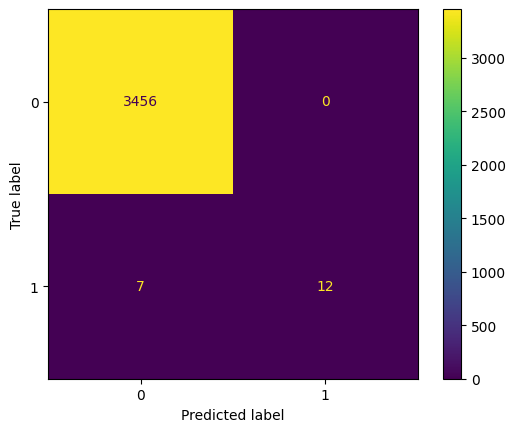

In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
## Now, lets the evaluate the mdoel using the confusion matrix
cnf = confusion_matrix(y_test, y_predicted)
display = ConfusionMatrixDisplay(cnf)
display.plot()
plt.show()

In [149]:
## Let's see the all metrics for this classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score
def print_results(y_test, y__predicted):
  print("The accuracy of the classifier is:{}".format(accuracy_score(y_test,y_predicted)))
  print("The precision score of the classifier is {}".format(precision_score(y_test,y_predicted)))
  print("The recall score of the classifier is {} ".format(recall_score(y_test,y_predicted)))
  print ('Finally the F1 score of the classifier is {}'.format(f1_score(y_test,y_predicted)))

## Oversampling using ADASYN, which stands for Adaptive Synthetic.

* First thing, ADASYN algorithm works like SMOTE but main difference is that it focuses on the minority classes that are difficult to classify. 

In [150]:
## First let's import the ADASYN from imblearn
from imblearn.over_sampling import ADASYN
## Let's resample the our X_train and y_train
X_ADASYN_resampled, y_ADASYN_resampled = ADASYN().fit_resample(X_train, y_train)

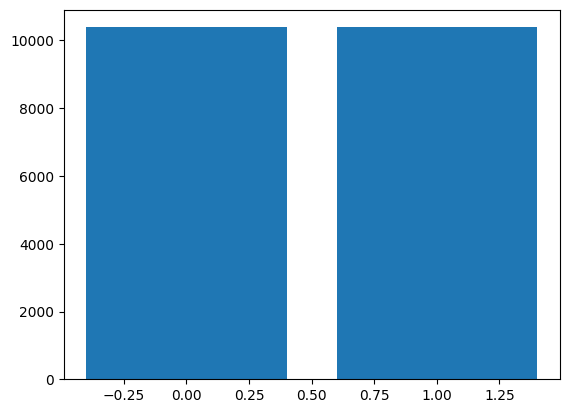

In [151]:
## Let's plot the graph for the class distribution using bar graph
plot_bar_class(y_ADASYN_resampled)

In [152]:
## ok let's train the random classifier algorithm, we already have imported
rcf_ADASYN = RandomForestClassifier()
rcf_ADASYN.fit(X_ADASYN_resampled,y_ADASYN_resampled)

RandomForestClassifier()

In [153]:
## Let's predict an devaluate our model
y_ADASYN_predicted = rcf_ADASYN.predict(X_test)

## Confusion matrix after ADASYN

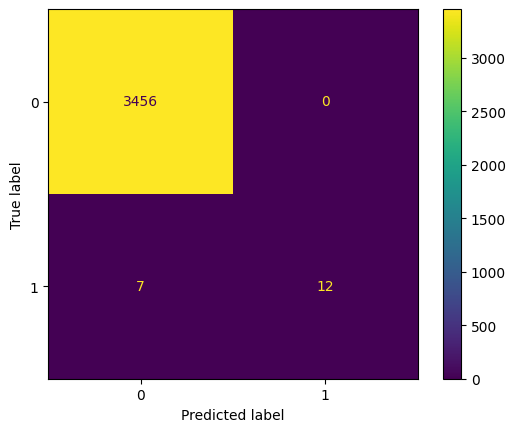

In [154]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
## Now, lets the evaluate the mdoel using the confusion matrix
cnf = confusion_matrix(y_test, y_ADASYN_predicted)
display = ConfusionMatrixDisplay(cnf)
display.plot()
plt.show()

In [155]:
## We will print the results for RandomForest classifier which was trained on the data using ADASYN algorithm
print_results(y_test,y_ADASYN_predicted)

The accuracy of the classifier is:0.9979856115107913
The precision score of the classifier is 1.0
The recall score of the classifier is 0.631578947368421 
Finally the F1 score of the classifier is 0.7741935483870968


In [156]:
## Let's see the final result for the RandomForest classifier which was trained on the data SMOTE algorithm
print_results(y_test, y_predicted)

The accuracy of the classifier is:0.9979856115107913
The precision score of the classifier is 1.0
The recall score of the classifier is 0.631578947368421 
Finally the F1 score of the classifier is 0.7741935483870968


##*Conclusion*

1. So in this experiment, we wanted to deal with the data that has skewed class distribution. This is also real case worl scenario where, we might have highly imbalanced class.

2. We wanted to deal with imbalanced class, as this has high impact on the algorithms where it might not get enough data to learn the pattern for class that are under represented in this distribution.

3. There are many ways we can deal with this issues such as `Oversampling` or `Undersampling`. It is usually suggested to prefer oversampling technique over undersampling, as we can lose some information and it's never a good news for a data scientis if he/she looses data.

4. So selected SMOTE and ADASYN for oversampling and compared both algorithm to see which is much better. As we observe they were both trained on RandomForestClassifier. They produced identical results, this may be all data were easily classified especially minority class.

5. We got very good results as we we precision score of 1 which means that we dont have any false positive, so we wont classify any fraudalent transaction as non-fraudalent. 

6. There were som other issues such as  huge scale difference between two columns especially time and amount, which we simply resolved by using Robust Scaler as there were some outliers. 